<a href="https://colab.research.google.com/github/almc6742/cu-git-workshop/blob/master/Exercise_2_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
fbpony = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
df = pd.read_csv(fbpony)

Remove rows that have $0.00 amount spent:


In [0]:
df = df[~((df['Amount Spent (USD)'] == 0))]

1. Graph a histogram of Amount Spent using Seaborn:

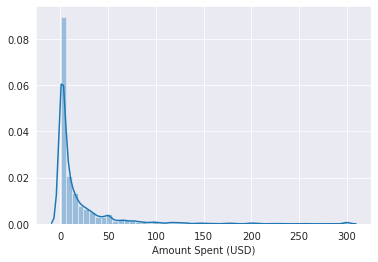

In [0]:
sns.set_style('darkgrid')
sns.distplot(df['Amount Spent (USD)'])

Create scatterplots for spend and: reach, frequency, impressions, and clicks. Do you see a linear relationship? As a result, do you think linear regression will work for this problem?

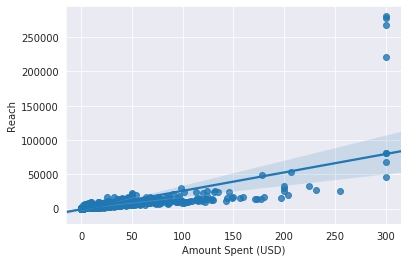

In [0]:
sns.regplot(df['Amount Spent (USD)'], df['Reach'])

Weak positive linear relationship between **Spend** and **Reach**

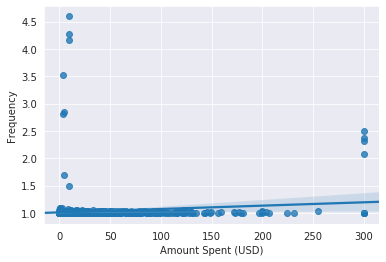

In [0]:
sns.regplot(df['Amount Spent (USD)'], df['Frequency'])

Weak positive - almost no - linear relationship between **Spend** and **Frequency**

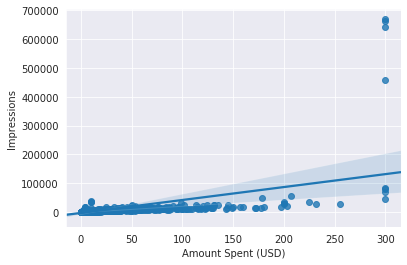

In [0]:
sns.regplot(df['Amount Spent (USD)'], df['Impressions'])

Weak positive linear relationship between **Spend** and **Impressions**

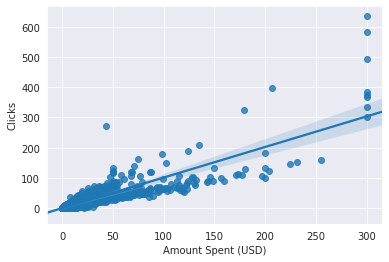

In [0]:
sns.regplot(df['Amount Spent (USD)'], df['Clicks'])

Moderate linear relationship between **Spend** and **Clicks**

Conclusion: A linear regression will work for this problem; however, several target predictor variables in our linear regression will fail to explain a significant amount of Spend due to a lack of correlation. The majority of target variables have weak - almost no - linear relationship with Spend and would result in a low R-squared through regression. Certain predictor variables with stronger positive relationships (i.e. Clicks) will explain more of the dependent variable, Spend.

---
Build a multiple regression where the outcome variable is Amount Spent and the predictor variables are: Campaign Name,
Reach,
Frequency,
Impressions,
Clicks,
Unique Clicks,
Page Likes,
Page Engagement,
Post Engagement,
Post Likes,
Post Comments,
Post Shares,
Photo Views, and
Website Clicks

First, convert 'Campaign Name' to some type of categorical value that the regression understands as such:

In [0]:
df['Campaign Name'] = df['Campaign Name'].astype('category')
df['Campaign Name'] = df['Campaign Name'].cat.reorder_categories(['Cyber Weekend', 'TravelPony: General Ads',
       'TravelPony: Conversion Test',
       'Post: "You need to get some real sun and we are here to..."',
       'Nanigans_7_720', 'Nanigans_7_723', 'Nanigans_7_721',
       'Nanigans_7_719', 'Nanigans_7_724', 'Nanigans_7_722',
       'Nanigans_6_713', 'Nanigans_5_701', 'Nanigans_5_712',
       'Nanigans_5_708', 'Nanigans_5_711', 'Nanigans_6_717',
       'Nanigans_5_703', 'Nanigans_5_706', 'Nanigans_5_705',
       'Nanigans_5_709', 'Nanigans_5_704', 'Nanigans_5_707',
       'Nanigans_6_716', 'Nanigans_5_702', 'Nanigans_5_710',
       'Nanigans_6_718', 'Nanigans_6_715',
       'Simple_Multi_Fill_Campaign_2_627', 'Nanigans_2_662',
       'Nanigans_2_664', 'Nanigans_2_654', 'Nanigans_2_660',
       'Nanigans_2_651', 'Nanigans_2_655', 'Nanigans_2_653',
       'Simple_Multi_Fill_Campaign_1_336', 'Nanigans_2_663',
       'Nanigans_2_640', 'Nanigans_2_656',
       'Simple_Multi_Fill_Campaign_2_631', 'Nanigans_2_652',
       'Nanigans_2_647', 'Nanigans_2_643', 'Nanigans_2_648',
       'Nanigans_2_645', 'Nanigans_2_671', 'Nanigans_2_641',
       'Nanigans_2_659', 'Simple_Multi_Fill_Campaign_2_569',
       'Simple_Multi_Fill_Campaign_2_563',
       'Simple_Multi_Fill_Campaign_2_603',
       'Simple_Multi_Fill_Campaign_2_601',
       'Simple_Multi_Fill_Campaign_2_619',
       'Simple_Multi_Fill_Campaign_2_602',
       'Simple_Multi_Fill_Campaign_2_564',
       'Simple_Multi_Fill_Campaign_2_597',
       'Simple_Multi_Fill_Campaign_2_556',
       'Simple_Multi_Fill_Campaign_2_554',
       'Simple_Multi_Fill_Campaign_2_583',
       'Simple_Multi_Fill_Campaign_2_568',
       'Simple_Multi_Fill_Campaign_2_553',
       'Simple_Multi_Fill_Campaign_2_575',
       'Simple_Multi_Fill_Campaign_2_621',
       'Simple_Multi_Fill_Campaign_2_624',
       'Simple_Multi_Fill_Campaign_1_346',
       'Simple_Multi_Fill_Campaign_1_341',
       'Simple_Multi_Fill_Campaign_2_555',
       'Simple_Multi_Fill_Campaign_2_600',
       'Simple_Multi_Fill_Campaign_2_562',
       'Simple_Multi_Fill_Campaign_2_547',
       'Simple_Multi_Fill_Campaign_2_566',
       'Simple_Multi_Fill_Campaign_2_559',
       'Simple_Multi_Fill_Campaign_2_560',
       'Simple_Multi_Fill_Campaign_2_620',
       'Simple_Multi_Fill_Campaign_2_617',
       'Simple_Multi_Fill_Campaign_2_599',
       'Simple_Multi_Fill_Campaign_2_545',
       'Simple_Multi_Fill_Campaign_2_622',
       'Simple_Multi_Fill_Campaign_2_548', 'Nanigans_2_670',
       'Nanigans_2_637', 'Nanigans_2_639', 'Nanigans_2_638',
       'Nanigans_2_646', 'Simple_Multi_Fill_Campaign_1_342',
       'Nanigans_2_642', 'Simple_Multi_Fill_Campaign_2_557',
       'Simple_Multi_Fill_Campaign_1_344',
       'Simple_Multi_Fill_Campaign_2_551',
       'Simple_Multi_Fill_Campaign_2_596', 'Nanigans_2_669',
       'Nanigans_2_661', 'Simple_Multi_Fill_Campaign_2_634',
       'Simple_Multi_Fill_Campaign_2_561',
       'Simple_Multi_Fill_Campaign_2_552',
       'Simple_Multi_Fill_Campaign_2_543',
       'Simple_Multi_Fill_Campaign_2_544',
       'Simple_Multi_Fill_Campaign_1_345',
       'Simple_Multi_Fill_Campaign_1_338',
       'Simple_Multi_Fill_Campaign_1_340', 'Nanigans_2_644',
       'Simple_Multi_Fill_Campaign_2_636',
       'Simple_Multi_Fill_Campaign_1_343',
       'Simple_Multi_Fill_Campaign_2_558',
       'Simple_Multi_Fill_Campaign_2_633',
       'Simple_Multi_Fill_Campaign_2_626',
       'Simple_Multi_Fill_Campaign_2_598',
       'Simple_Multi_Fill_Campaign_2_565',
       'Simple_Multi_Fill_Campaign_1_337',
       'Simple_Multi_Fill_Campaign_2_623',
       'Simple_Multi_Fill_Campaign_2_567',
       'Simple_Multi_Fill_Campaign_1_320',
       'Simple_Multi_Fill_Campaign_1_339',
       'Simple_Multi_Fill_Campaign_1_348',
       'Simple_Multi_Fill_Campaign_1_363',
       'Simple_Multi_Fill_Campaign_1_319',
       'Simple_Multi_Fill_Campaign_1_362',
       'Simple_Multi_Fill_Campaign_1_361',
       'Simple_Multi_Fill_Campaign_1_370',
       'Simple_Multi_Fill_Campaign_1_476',
       'Simple_Multi_Fill_Campaign_1_490',
       'Simple_Multi_Fill_Campaign_1_477',
       'Simple_Multi_Fill_Campaign_1_454',
       'Simple_Multi_Fill_Campaign_1_457',
       'Simple_Multi_Fill_Campaign_1_478',
       'Simple_Multi_Fill_Campaign_1_430',
       'Simple_Multi_Fill_Campaign_1_433',
       'Simple_Multi_Fill_Campaign_1_439',
       'Simple_Multi_Fill_Campaign_1_431',
       'Simple_Multi_Fill_Campaign_1_462',
       'Simple_Multi_Fill_Campaign_1_455',
       'Simple_Multi_Fill_Campaign_1_444',
       'Simple_Multi_Fill_Campaign_1_510',
       'Simple_Multi_Fill_Campaign_1_452',
       'Simple_Multi_Fill_Campaign_1_440',
       'Simple_Multi_Fill_Campaign_1_446',
       'Simple_Multi_Fill_Campaign_1_445',
       'Simple_Multi_Fill_Campaign_1_512',
       'Simple_Multi_Fill_Campaign_1_486',
       'Simple_Multi_Fill_Campaign_1_432',
       'Simple_Multi_Fill_Campaign_1_441',
       'Simple_Multi_Fill_Campaign_1_460',
       'Simple_Multi_Fill_Campaign_1_488',
       'Simple_Multi_Fill_Campaign_1_435',
       'Simple_Multi_Fill_Campaign_1_474',
       'Simple_Multi_Fill_Campaign_1_466',
       'Simple_Multi_Fill_Campaign_1_468',
       'Simple_Multi_Fill_Campaign_1_442',
       'Simple_Multi_Fill_Campaign_1_494',
       'Simple_Multi_Fill_Campaign_1_495',
       'Simple_Multi_Fill_Campaign_1_278',
       'Simple_Multi_Fill_Campaign_1_231',
       'Simple_Multi_Fill_Campaign_1_254',
       'Simple_Multi_Fill_Campaign_1_425',
       'Simple_Multi_Fill_Campaign_1_426',
       'Simple_Multi_Fill_Campaign_1_368',
       'Simple_Multi_Fill_Campaign_1_434',
       'Simple_Multi_Fill_Campaign_1_408',
       'Simple_Multi_Fill_Campaign_1_281',
       'Simple_Multi_Fill_Campaign_1_282',
       'Simple_Multi_Fill_Campaign_1_284',
       'Simple_Multi_Fill_Campaign_1_301',
       'Simple_Multi_Fill_Campaign_1_280',
       'Simple_Multi_Fill_Campaign_1_333',
       'Simple_Multi_Fill_Campaign_1_324',
       'Simple_Multi_Fill_Campaign_1_335',
       'Simple_Multi_Fill_Campaign_1_458',
       'Simple_Multi_Fill_Campaign_1_322',
       'Simple_Multi_Fill_Campaign_1_326',
       'Simple_Multi_Fill_Campaign_1_328',
       'Simple_Multi_Fill_Campaign_1_321',
       'Simple_Multi_Fill_Campaign_1_277',
       'Simple_Multi_Fill_Campaign_1_443',
       'Simple_Multi_Fill_Campaign_1_471',
       'Simple_Multi_Fill_Campaign_1_450',
       'Simple_Multi_Fill_Campaign_1_511',
       'Simple_Multi_Fill_Campaign_1_349',
       'Simple_Multi_Fill_Campaign_1_300',
       'Simple_Multi_Fill_Campaign_2_579',
       'Simple_Multi_Fill_Campaign_1_357',
       'Simple_Multi_Fill_Campaign_1_332',
       'Simple_Multi_Fill_Campaign_1_464',
       'Simple_Multi_Fill_Campaign_1_472',
       'Simple_Multi_Fill_Campaign_2_546',
       'Simple_Multi_Fill_Campaign_1_436',
       'Simple_Multi_Fill_Campaign_1_376',
       'Simple_Multi_Fill_Campaign_1_448',
       'Simple_Multi_Fill_Campaign_1_518',
       'Simple_Multi_Fill_Campaign_1_261',
       'Simple_Multi_Fill_Campaign_1_330',
       'Simple_Multi_Fill_Campaign_1_389',
       'Simple_Multi_Fill_Campaign_1_351',
       'Simple_Multi_Fill_Campaign_1_347',
       'Simple_Multi_Fill_Campaign_1_365',
       'Simple_Multi_Fill_Campaign_1_327',
       'Simple_Multi_Fill_Campaign_1_480',
       'Simple_Multi_Fill_Campaign_1_307',
       'Simple_Multi_Fill_Campaign_1_385',
       'Simple_Multi_Fill_Campaign_1_386',
       'Simple_Multi_Fill_Campaign_1_316',
       'Simple_Multi_Fill_Campaign_1_358',
       'Simple_Multi_Fill_Campaign_1_334',
       'Simple_Multi_Fill_Campaign_1_356',
       'Simple_Multi_Fill_Campaign_1_354',
       'Simple_Multi_Fill_Campaign_1_364',
       'Simple_Multi_Fill_Campaign_1_276',
       'Simple_Multi_Fill_Campaign_1_241',
       'Simple_Multi_Fill_Campaign_1_373',
       'Simple_Multi_Fill_Campaign_1_379',
       'Simple_Multi_Fill_Campaign_1_325',
       'Simple_Multi_Fill_Campaign_1_257',
       'Simple_Multi_Fill_Campaign_1_387',
       'Simple_Multi_Fill_Campaign_1_367',
       'Simple_Multi_Fill_Campaign_1_238',
       'Simple_Multi_Fill_Campaign_1_427',
       'Simple_Multi_Fill_Campaign_1_355',
       'Simple_Multi_Fill_Campaign_1_285',
       'Simple_Multi_Fill_Campaign_1_304',
       'Simple_Multi_Fill_Campaign_1_323',
       'Simple_Multi_Fill_Campaign_1_461',
       'Simple_Multi_Fill_Campaign_1_438',
       'Simple_Multi_Fill_Campaign_1_279',
       'Simple_Multi_Fill_Campaign_1_240',
       'Simple_Multi_Fill_Campaign_1_429',
       'Simple_Multi_Fill_Campaign_1_384',
       'Simple_Multi_Fill_Campaign_1_375',
       'Simple_Multi_Fill_Campaign_1_418',
       'Simple_Multi_Fill_Campaign_1_420',
       'Simple_Multi_Fill_Campaign_1_331',
       'Simple_Multi_Fill_Campaign_1_360',
       'Simple_Multi_Fill_Campaign_1_352',
       'Simple_Multi_Fill_Campaign_1_318',
       'Simple_Multi_Fill_Campaign_1_226',
       'Simple_Multi_Fill_Campaign_1_217',
       'Simple_Multi_Fill_Campaign_1_218',
       'Simple_Multi_Fill_Campaign_1_371',
       'Simple_Multi_Fill_Campaign_1_353',
       'Simple_Multi_Fill_Campaign_1_255',
       'Simple_Multi_Fill_Campaign_1_416',
       'Simple_Multi_Fill_Campaign_1_399',
       'Simple_Multi_Fill_Campaign_1_395',
       'Simple_Multi_Fill_Campaign_1_396',
       'Simple_Multi_Fill_Campaign_1_388',
       'Simple_Multi_Fill_Campaign_1_380',
       'Simple_Multi_Fill_Campaign_1_390',
       'Simple_Multi_Fill_Campaign_1_392',
       'Simple_Multi_Fill_Campaign_1_402',
       'Simple_Multi_Fill_Campaign_1_220',
       'Simple_Multi_Fill_Campaign_1_272',
       'Simple_Multi_Fill_Campaign_1_247',
       'Simple_Multi_Fill_Campaign_1_270',
       'Simple_Multi_Fill_Campaign_1_275',
       'Simple_Multi_Fill_Campaign_1_263',
       'Simple_Multi_Fill_Campaign_1_286',
       'Simple_Multi_Fill_Campaign_1_267',
       'Simple_Multi_Fill_Campaign_1_216',
       'Simple_Multi_Fill_Campaign_1_258',
       'Simple_Multi_Fill_Campaign_1_221',
       'Simple_Multi_Fill_Campaign_1_252',
       'Simple_Multi_Fill_Campaign_1_406',
       'Simple_Multi_Fill_Campaign_1_394',
       'Simple_Multi_Fill_Campaign_1_372',
       'Simple_Multi_Fill_Campaign_1_212',
       'Simple_Multi_Fill_Campaign_1_415',
       'Simple_Multi_Fill_Campaign_1_391',
       'Simple_Multi_Fill_Campaign_1_398',
       'Simple_Multi_Fill_Campaign_1_401',
       'Simple_Multi_Fill_Campaign_1_374',
       'Simple_Multi_Fill_Campaign_1_397',
       'Simple_Multi_Fill_Campaign_1_378',
       'Simple_Multi_Fill_Campaign_1_407',
       'Simple_Multi_Fill_Campaign_1_313',
       'Simple_Multi_Fill_Campaign_1_223',
       'Simple_Multi_Fill_Campaign_1_269',
       'Simple_Multi_Fill_Campaign_1_250',
       'Simple_Multi_Fill_Campaign_1_274',
       'Simple_Multi_Fill_Campaign_1_428',
       'Simple_Multi_Fill_Campaign_1_289',
       'Simple_Multi_Fill_Campaign_1_310',
       'Simple_Multi_Fill_Campaign_1_306',
       'Simple_Multi_Fill_Campaign_1_298',
       'Simple_Multi_Fill_Campaign_1_421',
       'Simple_Multi_Fill_Campaign_1_297',
       'Simple_Multi_Fill_Campaign_1_296',
       'Simple_Multi_Fill_Campaign_1_283',
       'Simple_Multi_Fill_Campaign_1_329',
       'Simple_Multi_Fill_Campaign_1_229',
       'Simple_Multi_Fill_Campaign_1_236',
       'Simple_Multi_Fill_Campaign_1_219',
       'Simple_Multi_Fill_Campaign_1_308',
       'Simple_Multi_Fill_Campaign_1_273',
       'Simple_Multi_Fill_Campaign_1_227',
       'Simple_Multi_Fill_Campaign_1_260',
       'Simple_Multi_Fill_Campaign_1_311',
       'Simple_Multi_Fill_Campaign_1_312',
       'Simple_Multi_Fill_Campaign_1_303',
       'Simple_Multi_Fill_Campaign_1_309',
       'Simple_Multi_Fill_Campaign_1_299',
       'Simple_Multi_Fill_Campaign_1_295',
       'Simple_Multi_Fill_Campaign_1_288',
       'Simple_Multi_Fill_Campaign_1_244',
       'Simple_Multi_Fill_Campaign_1_251',
       'Simple_Multi_Fill_Campaign_1_242',
       'Simple_Multi_Fill_Campaign_1_266',
       'Simple_Multi_Fill_Campaign_1_264',
       'Simple_Multi_Fill_Campaign_1_243',
       'Simple_Multi_Fill_Campaign_1_245',
       'Simple_Multi_Fill_Campaign_1_246',
       'Simple_Multi_Fill_Campaign_1_259',
       'Simple_Multi_Fill_Campaign_1_215',
       'Simple_Multi_Fill_Campaign_1_262',
       'Simple_Multi_Fill_Campaign_1_249',
       'Simple_Multi_Fill_Campaign_1_55',
       'Simple_Multi_Fill_Campaign_1_45',
       'Simple_Multi_Fill_Campaign_1_63',
       'Simple_Multi_Fill_Campaign_1_42',
       'Simple_Multi_Fill_Campaign_1_30',
       'Simple_Multi_Fill_Campaign_1_4', 'Simple_Multi_Fill_Campaign_1_5',
       'Simple_Multi_Fill_Campaign_1_36',
       'Simple_Multi_Fill_Campaign_1_64',
       'Simple_Multi_Fill_Campaign_1_58',
       'Simple_Multi_Fill_Campaign_1_48',
       'Simple_Multi_Fill_Campaign_1_49',
       'Simple_Multi_Fill_Campaign_1_66',
       'Simple_Multi_Fill_Campaign_1_128',
       'Simple_Multi_Fill_Campaign_1_165',
       'Simple_Multi_Fill_Campaign_1_57',
       'Simple_Multi_Fill_Campaign_1_160',
       'Simple_Multi_Fill_Campaign_1_176',
       'Simple_Multi_Fill_Campaign_1_156',
       'Simple_Multi_Fill_Campaign_1_157',
       'Simple_Multi_Fill_Campaign_1_153',
       'Simple_Multi_Fill_Campaign_1_172',
       'Simple_Multi_Fill_Campaign_1_170',
       'Simple_Multi_Fill_Campaign_1_207',
       'Simple_Multi_Fill_Campaign_1_211',
       'Simple_Multi_Fill_Campaign_1_208',
       'Simple_Multi_Fill_Campaign_1_161',
       'Simple_Multi_Fill_Campaign_1_209',
       'Simple_Multi_Fill_Campaign_1_175',
       'Simple_Multi_Fill_Campaign_1_178',
       'Simple_Multi_Fill_Campaign_1_187',
       'Simple_Multi_Fill_Campaign_1_52',
       'Simple_Multi_Fill_Campaign_1_181',
       'Simple_Multi_Fill_Campaign_1_196',
       'Simple_Multi_Fill_Campaign_1_194',
       'Simple_Multi_Fill_Campaign_1_198',
       'Simple_Multi_Fill_Campaign_1_200',
       'Simple_Multi_Fill_Campaign_1_182',
       'Simple_Multi_Fill_Campaign_1_189',
       'Simple_Multi_Fill_Campaign_1_190',
       'Simple_Multi_Fill_Campaign_1_183',
       'Simple_Multi_Fill_Campaign_1_210',
       'Simple_Multi_Fill_Campaign_1_192',
       'Simple_Multi_Fill_Campaign_1_204',
       'Simple_Multi_Fill_Campaign_1_174',
       'Simple_Multi_Fill_Campaign_1_162',
       'Simple_Multi_Fill_Campaign_1_159',
       'Simple_Multi_Fill_Campaign_1_155',
       'Simple_Multi_Fill_Campaign_1_169',
       'Simple_Multi_Fill_Campaign_1_171',
       'Simple_Multi_Fill_Campaign_1_129',
       'Simple_Multi_Fill_Campaign_1_43',
       'Simple_Multi_Fill_Campaign_1_20',
       'Simple_Multi_Fill_Campaign_1_1',
       'Simple_Multi_Fill_Campaign_1_16',
       'Simple_Multi_Fill_Campaign_1_15',
       'Simple_Multi_Fill_Campaign_1_33',
       'Simple_Multi_Fill_Campaign_1_23',
       'Simple_Multi_Fill_Campaign_1_24',
       'Simple_Multi_Fill_Campaign_1_35',
       'Simple_Multi_Fill_Campaign_1_26',
       'Simple_Multi_Fill_Campaign_1_18',
       'Simple_Multi_Fill_Campaign_1_14',
       'Simple_Multi_Fill_Campaign_1_21',
       'Simple_Multi_Fill_Campaign_1_17',
       'Simple_Multi_Fill_Campaign_1_22',
       'Simple_Multi_Fill_Campaign_1_6',
       'http://travelpony...-Clicks-US-13-65',
       'Travelpony-Page Likes-US-13-65', 'Ad 1'], ordered=True)
df['Campaign Name'] = df['Campaign Name'].cat.codes

The above code creates a map of sortable categories by replacing category strings with ordinal data.

In [0]:
X = df[['Campaign Name', 'Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks', 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
Y = df['Amount Spent (USD)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1723.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:42:13   Log-Likelihood:                -6601.0
No. Observations:                1802   AIC:                         1.323e+04
Df Residuals:                    1788   BIC:                         1.331e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.3550      1.520     

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The three predictors with the highest predictive value are:


1.   Page Likes (23.4320)
2.   Post Engagement (17.0799)
3.   Frequency (6.1234)






